In [189]:
import numpy as np
import pandas as pd
import re
from collections import Counter

In [190]:
data= pd.read_excel('/Users/dongxujia/Dropbox/DS-Discovery_GenderDiversity/04_Data/raw/jobads.xlsx')

In [191]:
data.shape

(6472, 5)

In [192]:
data.id.nunique()

6472

In [193]:
data.head()

,id,job_title_en,job_requirement_en,job_description_en,job_category
0,5606,flash and deliver prototypes,NaN,job description\n\nconstruction and electrical...,engineering--engineering
1,14,physical verification engineer lnd_150019,your duties as a system test verification eng...,Your duties as a system test & verification en...,"research and development--mechanical,engineeri..."
2,5371,3d printing specialist for packaging materials,academic degree in mechanical engineering pac...,Establishing a global 3d printing strategy for...,logistics--other
3,831,a strengthening support employee,successfully completed natural or engineering ...,we are looking for an active and motivated sup...,"research and development--other,research and d..."
4,360,account manager,a degree in the engineering field several year...,as accoutn manager (m / w) of the business uni...,"marketing and sales--service customer support,..."


### • 1) Classify job titles using a two-factor model
	○ Find the area of the job (e.g. software engineering)
		○ (for the area the first element of the job category might be helpful) and
	○ and the rank of the job (e.g. lead, senior, group lead, team leader, assistant) if applicable. 


### • 2) Classify job titles using the degree requirements
	○ Isolate the type of degree and the number of years of worker experience for each position
	○ Group positions by degree x experience groups 

In [194]:
data.head()

,id,job_title_en,job_requirement_en,job_description_en,job_category
0,5606,flash and deliver prototypes,NaN,job description\n\nconstruction and electrical...,engineering--engineering
1,14,physical verification engineer lnd_150019,your duties as a system test verification eng...,Your duties as a system test & verification en...,"research and development--mechanical,engineeri..."
2,5371,3d printing specialist for packaging materials,academic degree in mechanical engineering pac...,Establishing a global 3d printing strategy for...,logistics--other
3,831,a strengthening support employee,successfully completed natural or engineering ...,we are looking for an active and motivated sup...,"research and development--other,research and d..."
4,360,account manager,a degree in the engineering field several year...,as accoutn manager (m / w) of the business uni...,"marketing and sales--service customer support,..."


### Use job_category to extract job_area

In [195]:
# some entries in job_category are null types
data.job_category.isnull().value_counts()

False    6440
True       32
Name: job_category, dtype: int64

In [196]:
# change these to None
data.loc[data.job_category.isnull(),['job_category']] = None

In [197]:
data.job_category.str.contains("--", na=False).value_counts()

True     6415
False      57
Name: job_category, dtype: int64

In [198]:
# note that job_categories that are without "--" are either None or "general management"

data[~data.job_category.str.contains("--", na=False)].head()

,id,job_title_en,job_requirement_en,job_description_en,job_category
40,4611,acquisition tpl,missing,? guided by supply phases to tire pressure con...,None
392,2062,bu head of engine systems iran,academic degree in electrical engineering mech...,target is to build up and develop a joint vent...,general management
477,6423,category buyer for embedded software licenses,missing,description:\n license price and contract nego...,None
562,2405,cbs reporting controller admin coach parttime...,successful completion of degree in business ad...,develop worldwide cbs reporting strategy for c...,general management
820,6419,control software engineer replacement panagio...,missing,Perform software projects for technical concep...,None


In [199]:
# Create a new column called "job_area" that keeps the word before "--" in job_category.
# For entries in job_category that do not contain "--" (either None or "general management"),
# fill in None for the former and "management" for the latter.

In [200]:
data.loc[data.job_category.str.contains(
    "--", na=False),'job_area'] = data.job_category.str.split("--").str[0]

In [201]:
data.loc[data.job_category.isnull(),'job_area'] = None

In [202]:
data.loc[data.job_category == "general management",'job_area'] = "management"

In [203]:
data.job_area = data.job_area.str.replace(","," ")

In [204]:
# create another column job_area_oneword that combine each entry in job_area as one word using underscores

In [205]:
data['job_area_oneword'] = data.job_area.str.replace(" ","_")

In [206]:
data.head()

,id,job_title_en,job_requirement_en,job_description_en,job_category,job_area,job_area_oneword
0,5606,flash and deliver prototypes,NaN,job description\n\nconstruction and electrical...,engineering--engineering,engineering,engineering
1,14,physical verification engineer lnd_150019,your duties as a system test verification eng...,Your duties as a system test & verification en...,"research and development--mechanical,engineeri...",research and development,research_and_development
2,5371,3d printing specialist for packaging materials,academic degree in mechanical engineering pac...,Establishing a global 3d printing strategy for...,logistics--other,logistics,logistics
3,831,a strengthening support employee,successfully completed natural or engineering ...,we are looking for an active and motivated sup...,"research and development--other,research and d...",research and development,research_and_development
4,360,account manager,a degree in the engineering field several year...,as accoutn manager (m / w) of the business uni...,"marketing and sales--service customer support,...",marketing and sales,marketing_and_sales


In [207]:
#Some entries in job_area_oneword still have multiple listings (general management + other stuff) 
# replace the ones that starts with general management with general management. 

In [208]:
data.loc[data.job_area_oneword.str.startswith(
    'general_management',na=False),'job_area_oneword'] = 'general_management'

In [209]:
job_area_oneword_counter = Counter(data.job_area_oneword.astype(str))

In [210]:
# 20 most common job_area_oneword

job_area_oneword_counter.most_common(20)

[('engineering', 1865),
 ('research_and_development', 931),
 ('quality', 443),
 ('marketing_and_sales', 439),
 ('finance_and_controlling', 373),
 ('information_technology', 373),
 ('project_management', 317),
 ('human_resources', 291),
 ('logistics', 261),
 ('purchasing', 256),
 ('manufacturing_operations_and_production', 208),
 ('industrial_engineering', 183),
 ('administration_and_assistance', 158),
 ('general_management', 68),
 ('key_account_management', 67),
 ('communications', 62),
 ('None', 32),
 ('law_patents_and_licences', 27),
 ('facility_management', 26),
 ('management', 25)]

In [211]:
# create a column called "job_area_broader" to create broader job area indicator using the classification below:

# engineering = engineering, industrial_engineering, research_and_development
# finance = finance_and_controlling, law_patents_and_licences, auditing
# marketing_and_sales = marketing_and_sales, key_account_management, communications
# health_safety_and_security_environment = health_safety_and_security, environment

In [212]:
data['job_area_broader'] = data.job_area_oneword

In [213]:
data.loc[(data.job_area_oneword == 'industrial_engineering')|(
    data.job_area_oneword == 'research_and_development'), 'job_area_broader'] = 'engineering'

In [214]:
data.loc[(data.job_area_oneword == 'finance_and_controlling')|(
    data.job_area_oneword == 'law_patents_and_licences')|(
    data.job_area_oneword == 'auditing'), 'job_area_broader'] = 'finance'

In [215]:
data.loc[(data.job_area_oneword == 'key_account_management')|(
    data.job_area_oneword == 'communications'), 'job_area_broader'] = 'marketing_and_sales'

In [216]:
data.loc[(data.job_area_oneword == 'health_safety_and_security')|(
    data.job_area_oneword == 'environment'), 'job_area_broader'] = 'health_safety_and_security_environment'

In [217]:
# There are 32 entries of job_category that are none
# impute a job_area_broader for these entries by looking at the job title and description 
# and find the closest match

In [218]:
l = '6419 51 29 41 3301 5738 3799 3825 6443 3394 783 4006 4007 4248 4250 4251 4454 4452 3380 4000 5295 4350 4402'

In [219]:
engineering_index = l.split(' ')

In [220]:
engineering_index = [int(i) for i in engineering_index]

In [221]:
for i in engineering_index:
    data.loc[data.id == i,'job_area_broader'] = 'engineering'

In [222]:
data.loc[data.id == 4611,'job_area_broader'] = 'facility_management'
data.loc[data.id == 6423,'job_area_broader'] = 'purchasing'
data.loc[data.id == 3824,'job_area_broader'] = 'marketing_and_sales'
data.loc[data.id == 3425,'job_area_broader'] = 'logistics'
data.loc[data.id == 4411,'job_area_broader'] = 'management'
data.loc[data.id == 3480,'job_area_broader'] = 'finance'
data.loc[data.id == 2556,'job_area_broader'] = 'human_resources'
data.loc[data.id == 3614,'job_area_broader'] = 'administration_and_assistance'
data.loc[data.id == 702,'job_area_broader'] = 'project_management'

In [223]:
data.job_area_broader.isnull().value_counts()

False    6472
Name: job_area_broader, dtype: int64

In [224]:
job_area_broader_counter = Counter(data.job_area_broader.astype(str))

In [225]:
# job_area_broader in descending order of popularity

job_area_broader_counter.most_common()

[('engineering', 3002),
 ('marketing_and_sales', 569),
 ('quality', 443),
 ('finance', 420),
 ('information_technology', 373),
 ('project_management', 318),
 ('human_resources', 292),
 ('logistics', 262),
 ('purchasing', 257),
 ('manufacturing_operations_and_production', 208),
 ('administration_and_assistance', 159),
 ('general_management', 68),
 ('health_safety_and_security_environment', 38),
 ('facility_management', 27),
 ('management', 26),
 ('mergers_and_acquisitions', 10)]

### Extract job_rank (lead, senior, group lead, team leader, assistant)

In [226]:
ranks = ['manager', 'specialist', 'head', 'coach', 'assistant', 
        'expert', 'lead', 'senior', 'junior', 'director', 'supervisor']

In [227]:
# create column job_rank that extract ranks from job_title_en if job_title_en contain any word in the ranks list
# if no matching word from ranks list is found, then the job_rank should be None

In [228]:
data['job_rank'] = None

In [229]:
for i in ranks:
    data.loc[data.job_title_en.str.contains(i,na=False),'job_rank'] = i

In [230]:
data.job_rank.isnull().value_counts()

True     3297
False    3175
Name: job_rank, dtype: int64

In [231]:
data.head()

,id,job_title_en,job_requirement_en,job_description_en,job_category,job_area,job_area_oneword,job_area_broader,job_rank
0,5606,flash and deliver prototypes,NaN,job description\n\nconstruction and electrical...,engineering--engineering,engineering,engineering,engineering,None
1,14,physical verification engineer lnd_150019,your duties as a system test verification eng...,Your duties as a system test & verification en...,"research and development--mechanical,engineeri...",research and development,research_and_development,engineering,None
2,5371,3d printing specialist for packaging materials,academic degree in mechanical engineering pac...,Establishing a global 3d printing strategy for...,logistics--other,logistics,logistics,logistics,specialist
3,831,a strengthening support employee,successfully completed natural or engineering ...,we are looking for an active and motivated sup...,"research and development--other,research and d...",research and development,research_and_development,engineering,None
4,360,account manager,a degree in the engineering field several year...,as accoutn manager (m / w) of the business uni...,"marketing and sales--service customer support,...",marketing and sales,marketing_and_sales,marketing_and_sales,manager


### Extract degree and experience information from job_requirement_en

In [232]:
# job_requirement_en column contains null type values

In [233]:
data.job_requirement_en.isnull().value_counts()

False    6457
True       15
Name: job_requirement_en, dtype: int64

In [234]:
# job_requirement_en column contains entries that only one or two words, such as
# - "tbd", "missing", "x" , "dd", "ot", 
# "xxx","vv","xx","s","bb" "d", "cf epr", "see above"

In [235]:
data[data.job_requirement_en.str.split(" ").str.len() < 3].shape[0]

405

In [236]:
# replacing these entries with None

In [237]:
data.loc[data.job_requirement_en.isnull(),'job_requirement_en'] = None

In [238]:
data.loc[data.job_requirement_en.str.split(" ").str.len() < 3,'job_requirement_en'] = None

In [239]:
data.job_requirement_en.isnull().value_counts()

False    6052
True      420
Name: job_requirement_en, dtype: int64

In [240]:
degrees = ['bachelor','bachelors','university','master','doctor','doctorate','doctoral']

In [241]:
# create column job_degree that extract degree requirements from job_requirement_en 
# if job_requirement_en contain any word in the degrees list
# if no matching word from degrees list is found, then the job_degree should be None

In [242]:
data['job_degree'] = None

In [243]:
for c in degrees:
    data.loc[data.job_requirement_en.str.contains(c,na=False),'job_degree'] = c

In [244]:
data.job_degree.isnull().value_counts()

True     5192
False    1280
Name: job_degree, dtype: int64

In [245]:
data.head()

,id,job_title_en,job_requirement_en,job_description_en,job_category,job_area,job_area_oneword,job_area_broader,job_rank,job_degree
0,5606,flash and deliver prototypes,None,job description\n\nconstruction and electrical...,engineering--engineering,engineering,engineering,engineering,None,None
1,14,physical verification engineer lnd_150019,your duties as a system test verification eng...,Your duties as a system test & verification en...,"research and development--mechanical,engineeri...",research and development,research_and_development,engineering,None,None
2,5371,3d printing specialist for packaging materials,academic degree in mechanical engineering pac...,Establishing a global 3d printing strategy for...,logistics--other,logistics,logistics,logistics,specialist,None
3,831,a strengthening support employee,successfully completed natural or engineering ...,we are looking for an active and motivated sup...,"research and development--other,research and d...",research and development,research_and_development,engineering,None,None
4,360,account manager,a degree in the engineering field several year...,as accoutn manager (m / w) of the business uni...,"marketing and sales--service customer support,...",marketing and sales,marketing_and_sales,marketing_and_sales,manager,None


### Extract # years of experience information from job_requirement_en

In [246]:
data['extracted_year'] = None

In [247]:
for i in np.arange(data.shape[0]):
    regex_search_years = re.search('\w+\s\w+\syears\s\w+\s\w+', str(
        data.loc[i]['job_requirement_en']))
    regex_search_year = re.search('\w+\s\w+\syear\s\w+\s\w+', str(
        data.loc[i]['job_requirement_en']))
    if regex_search_years is not None:
        data.loc[i,'extracted_year'] = regex_search_years.group(0)
    if regex_search_year is not None:
        data.loc[i,'extracted_year'] = regex_search_year.group(0)

In [248]:
data['extracted_year'].notnull().value_counts()

True     3349
False    3123
Name: extracted_year, dtype: int64

In [249]:
data['extracted_year'].str.contains('\d').value_counts()

False    3226
True      123
Name: extracted_year, dtype: int64

In [250]:
number_map = {"one":'1', "two":'2',"three":'3',"four":'4',"five":'5',
              "six":'6',"seven":'7',"eight":'8',"nine":'9',"ten":'10'}

In [251]:
# mapping the words from 1-10 to numerical value

In [252]:
for c in number_map:
    data['extracted_year'] = data['extracted_year'].str.replace(c, number_map[c])

In [253]:
data['extracted_year'].str.contains('\d').value_counts()

False    3186
True      163
Name: extracted_year, dtype: int64

In [254]:
data[data['extracted_year'].str.contains('\d',na=False)].extracted_year.head()

114          min 2 years work experience
155        minimum 3 years of experience
166          least 2 years of experience
181        minimum 3 years experience in
191    1012 per year identification with
Name: extracted_year, dtype: object

In [255]:
data['years_in_number'] = data['extracted_year'].str.extract('(\d+)', expand=False)

In [256]:
data[data['years_in_number'].str.contains('\d',na=False)].years_in_number.head()

114       2
155       3
166       2
181       3
191    1012
Name: years_in_number, dtype: object

In [257]:
data['years_in_number'] = data['years_in_number'].astype('float')

In [258]:
# outlier

data[data['years_in_number'] > 60]

,id,job_title_en,job_requirement_en,job_description_en,job_category,job_area,job_area_oneword,job_area_broader,job_rank,job_degree,extracted_year,years_in_number
191,4613,area leader bus and truck tires bullpen rhinemain,completed commercial or technical training wit...,sale of truck and low loader tires and service...,marketing and sales--sales and distribution,marketing and sales,marketing_and_sales,marketing_and_sales,lead,None,1012 per year identification with,1012.0


In [259]:
data.loc[191,'years_in_number'] = None

In [260]:
# A lot of entries use "several years","many years", "some years","more years", "multiple years", 
# "long years", "perennial years" to describe the experience requirement
# create a column "adjective_year" containing the adjectives used in job_requirement to describe
# required years of job experience

In [261]:
data.extracted_year.str.contains("several\syear").value_counts()

True     2775
False     574
Name: extracted_year, dtype: int64

In [262]:
data.extracted_year.str.contains("many\syear").value_counts()

False    3082
True      267
Name: extracted_year, dtype: int64

In [263]:
data.extracted_year.str.contains("some\syear").value_counts()

False    3340
True        9
Name: extracted_year, dtype: int64

In [264]:
data.extracted_year.str.contains("more\syear").value_counts()

False    3270
True       79
Name: extracted_year, dtype: int64

In [265]:
data.extracted_year.str.contains("multiple\syear").value_counts()

False    3324
True       25
Name: extracted_year, dtype: int64

In [266]:
data.extracted_year.str.contains("long\syear").value_counts()

False    3335
True       14
Name: extracted_year, dtype: int64

In [267]:
data.extracted_year.str.contains("perennial\syear").value_counts()

False    3341
True        8
Name: extracted_year, dtype: int64

In [268]:
data.loc[data['extracted_year'].str.contains('several\syear',na=False),'adjective_year'] = 'several'

In [269]:
data.loc[data['extracted_year'].str.contains('many\syear',na=False),'adjective_year'] = 'many'

In [270]:
data.loc[data['extracted_year'].str.contains('some\syear',na=False),'adjective_year'] = 'some'

In [271]:
data.loc[data['extracted_year'].str.contains('more\syear',na=False),'adjective_year'] = 'more'

In [272]:
data.loc[data['extracted_year'].str.contains('multiple\syear',na=False),'adjective_year'] = 'multiple'

In [273]:
data.loc[data['extracted_year'].str.contains('long\syear',na=False),'adjective_year'] = 'long'

In [274]:
data.loc[data['extracted_year'].str.contains('perennial\syear',na=False),'adjective_year'] = 'perennial'

In [275]:
# all the "years" info left are not very meaningful

data[data.extracted_year.notnull() & data.adjective_year.isnull() & data.years_in_number.isnull()].extracted_year

17              training with years of work
182           times per year willingness to
187           times per year willingness to
188               times per year travel and
189           times per year willingness to
191       1012 per year identification with
201                   times a year place of
202                   times a year place of
287     training with years of professional
291     training with years of professional
1489             training and years of work
1681              times per year to measure
3207              design with years of work
3285            days per year strong social
3708      events per year for participation
3904       with first years of professional
4541                    in the year we look
4759    studies founded years of experience
4922                based on years of sound
6219     knowledge with years of experience
Name: extracted_year, dtype: object

In [277]:
data.head()

,id,job_title_en,job_requirement_en,job_description_en,job_category,job_area,job_area_oneword,job_area_broader,job_rank,job_degree,extracted_year,years_in_number,adjective_year
0,5606,flash and deliver prototypes,None,job description\n\nconstruction and electrical...,engineering--engineering,engineering,engineering,engineering,None,None,None,NaN,NaN
1,14,physical verification engineer lnd_150019,your duties as a system test verification eng...,Your duties as a system test & verification en...,"research and development--mechanical,engineeri...",research and development,research_and_development,engineering,None,None,None,NaN,NaN
2,5371,3d printing specialist for packaging materials,academic degree in mechanical engineering pac...,Establishing a global 3d printing strategy for...,logistics--other,logistics,logistics,logistics,specialist,None,education several years of professional,NaN,several
3,831,a strengthening support employee,successfully completed natural or engineering ...,we are looking for an active and motivated sup...,"research and development--other,research and d...",research and development,research_and_development,engineering,None,None,None,NaN,NaN
4,360,account manager,a degree in the engineering field several year...,as accoutn manager (m / w) of the business uni...,"marketing and sales--service customer support,...",marketing and sales,marketing_and_sales,marketing_and_sales,manager,None,field several years of experience,NaN,several


# genderdecoder 

In [293]:
import os 
os.getcwd()

'/Users/dongxujia/Desktop/Research'

In [307]:
import sys
sys.path.append('genderDecoder/')
sys.path.append('genderDecoder/genderDecoder/')
sys.path.append('genderDecoder/genderDecoder/assess')

In [308]:
from genderDecoder import assess

In [334]:
# example of genderDecoder

assess("independent strong interpersonal dominant polite driven")

{'result': 'masculine-coded',
 'explanation': 'This job ad uses more words that are stereotypically masculine than words that are stereotypically feminine. It risks putting women off applying, but will probably encourage men to apply.',
 'masculine_coded_words': ['independent', 'dominant', 'dominant', 'driven'],
 'feminine_coded_words': ['interpersonal', 'interpersonal', 'polite']}

In [313]:
# raw data

df= pd.read_excel('/Users/dongxujia/Dropbox/DS-Discovery_GenderDiversity/04_Data/raw/jobads.xlsx')

In [316]:
df['job_requirement_decoder'] = df.job_requirement_en.dropna().apply(assess)

In [326]:
# 15 rows have null values

df.job_requirement_decoder.isnull().value_counts()

False    6457
True       15
Name: job_requirement_decoder, dtype: int64

In [328]:
df['job_requirement_result'] = df[
    'job_requirement_decoder'].dropna().apply(lambda x: x.get('result'))
df['job_requirement_masculine_coded_words'] = df[
    'job_requirement_decoder'].dropna().apply(lambda x: x.get('masculine_coded_words'))
df['job_requirement_feminine_coded_words'] = df[
    'job_requirement_decoder'].dropna().apply(lambda x: x.get('feminine_coded_words'))

In [330]:
df['job_description_decoder'] = df.job_description_en.dropna().apply(assess)

In [335]:
# no null values

df.job_description_decoder.isnull().value_counts()

False    6472
Name: job_description_decoder, dtype: int64

In [336]:
df['job_description_result'] = df[
    'job_description_decoder'].dropna().apply(lambda x: x.get('result'))
df['job_description_masculine_coded_words'] = df[
    'job_description_decoder'].dropna().apply(lambda x: x.get('masculine_coded_words'))
df['job_description_feminine_coded_words'] = df[
    'job_description_decoder'].dropna().apply(lambda x: x.get('feminine_coded_words'))

In [356]:
df

,id,job_title_en,job_requirement_en,job_description_en,job_category,job_requirement_decoder,job_requirement_result,job_requirement_masculine_coded_words,job_requirement_feminine_coded_words,job_description_decoder,job_description_result,job_description_masculine_coded_words,job_description_feminine_coded_words,combined_result,job_requirement_score,job_description_score
0,5606,flash and deliver prototypes,NaN,job description\n\nconstruction and electrical...,engineering--engineering,NaN,NaN,NaN,NaN,"{'result': 'neutral', 'explanation': 'This job...",neutral,[],[],NaN,NaN,0
1,14,physical verification engineer lnd_150019,your duties as a system test verification eng...,Your duties as a system test & verification en...,"research and development--mechanical,engineeri...","{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,[analysis],"[support, cooperation, cooperation, responsibi...","{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,[analysis],"[support, cooperation, responsibility, support...",feminine-codedfeminine-coded,-1.0,-1
2,5371,3d printing specialist for packaging materials,academic degree in mechanical engineering pac...,Establishing a global 3d printing strategy for...,logistics--other,"{'result': 'neutral', 'explanation': 'This job...",neutral,[],[],"{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,[leading],"[collaboration, support, collaborative]",neutralfeminine-coded,0.0,-1
3,831,a strengthening support employee,successfully completed natural or engineering ...,we are looking for an active and motivated sup...,"research and development--other,research and d...","{'result': 'strongly masculine-coded', 'explan...",strongly masculine-coded,[independent],[],"{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,[active],"[support, support, support]",strongly masculine-codedfeminine-coded,2.0,-1
4,360,account manager,a degree in the engineering field several year...,as accoutn manager (m / w) of the business uni...,"marketing and sales--service customer support,...","{'result': 'strongly masculine-coded', 'explan...",strongly masculine-coded,[analytical],[],"{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,[analysis],"[cooperation, support]",strongly masculine-codedfeminine-coded,2.0,-1
5,5981,account manager,academic degree in economics engineering indus...,determination & development of customer relati...,key account management--key account management...,"{'result': 'strongly feminine-coded', 'explana...",strongly feminine-coded,[],[understanding],"{'result': 'neutral', 'explanation': 'This job...",neutral,"[determination, lead, challenges]","[support, support, responsible]",strongly feminine-codedneutral,-2.0,0
6,4907,account manager,degree ideally in the industrial engineering a...,development of strategic partnerships with wel...,"marketing and sales--service customer support,...","{'result': 'strongly feminine-coded', 'explana...",strongly feminine-coded,[],[understanding],"{'result': 'neutral', 'explanation': 'This job...",neutral,[],[],strongly feminine-codedneutral,-2.0,0
7,80,account manager,degree in engineering mechanical engineering a...,We are looking for our automotive sector a key...,key account management--key account management,"{'result': 'strongly masculine-coded', 'explan...",strongly masculine-coded,[assertiveness],[],"{'result': 'neutral', 'explanation': 'This job...",neutral,"[competitive, analyzes]","[cooperation, agreements]",strongly masculine-codedneutral,2.0,0
8,1345,account manager,degree in industrial engineering engineering s...,support and build strategic partnerships and r...,key account management--key account management,"{'result': 'strongly masculine-coded', 'explan...",strongly masculine-coded,"[competence, analytical]",[],"{'result': 'feminine-coded', 'explanation': 'T...",feminine-coded,[lead],"[support, support, depending, agreements]",strongly masculine-codedfeminine-coded,2.0,-1
9,852,account manager,

In [348]:
df.job_requirement_result.unique()

array([nan, 'feminine-coded', 'neutral', 'strongly masculine-coded',
       'strongly feminine-coded', 'masculine-coded'], dtype=object)

In [353]:
# count results for job_requirement

df.job_requirement_result.value_counts()

strongly masculine-coded    2742
neutral                     2188
masculine-coded              828
strongly feminine-coded      471
feminine-coded               228
Name: job_requirement_result, dtype: int64

In [355]:
# count results for job_description

df.job_description_result.value_counts()

feminine-coded              1889
strongly feminine-coded     1472
neutral                     1336
masculine-coded             1170
strongly masculine-coded     605
Name: job_description_result, dtype: int64

In [ ]:
# I think the results above are really interesting. 
# There are more masculine-coded job_requirements but more feminine-coded job_descriptions
# such results may be biased due to the word_lists this decoder is using


# to compare each entry's job_requirement_result and job_description_result 
# I create the mapping below

In [346]:
# create numerical value mapping for the result, 
decoder_result_mapping = {
    "strongly feminine-coded" : -2, 
    "feminine-coded" : -1,
    "neutral": 0,
    "masculine-coded": 1,
    "strongly masculine-coded": 2}

In [375]:
# Assign a score for each entry's job_requirement_result and job_description_result

df['job_requirement_score'] = df.job_requirement_result.map(decoder_result_mapping)

In [376]:
df['job_description_score'] = df.job_description_result.map(decoder_result_mapping).astype(float)

In [379]:
df[df['job_requirement_score'] > df['job_description_score']].shape[0]/df.shape[0]

0.6487948084054388

In [ ]:
# About 65% of the entries have a higher job_requirement_score, 
# which means their job_requirement are more masculine_coded than their job_description

In [ ]:
# adding the two scores together for each entry

In [357]:
# combine ench entry's job_requirement_result with job_description_result

df['combined_score'] = df.job_requirement_score + df.job_description_score

In [364]:
df.combined_score.value_counts()

 0.0    1507
 1.0    1311
 2.0     904
-1.0     814
-2.0     739
 3.0     589
 4.0     286
-3.0     186
-4.0     121
Name: combined_score, dtype: int64

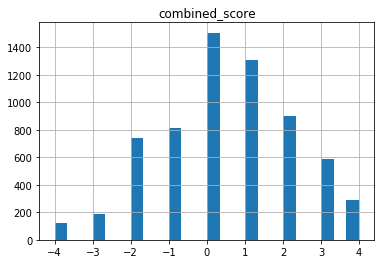

In [367]:
df.hist(column = 'combined_score',bins = 24);